In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn import linear_model

%matplotlib inline

In [3]:
lifts = pd.read_csv("../../Data/openpowerlifting.csv")
meets = pd.read_csv("../../Data/meets.csv")

In [4]:
lifts.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [5]:
meets.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [6]:
data_set= pd.merge(lifts, meets, on="MeetID")

In [7]:
data_set.columns

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg',
       'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'MeetPath', 'Federation', 'Date', 'MeetCountry', 'MeetState',
       'MeetTown', 'MeetName'],
      dtype='object')

In [8]:
data_set[data_set.Sex == 'F'].describe()

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
count,87369.000000,43485.000000,87081.000000,521.000000,71205.000000,593.000000,82279.000000,1221.000000,77631.000000,84449.000000,84182.000000
mean,5148.406185,31.601621,69.409177,77.889962,113.263464,18.286020,64.868545,94.235954,133.765183,277.609623,286.856441
std,2748.064287,12.103415,16.768542,108.636890,36.974450,86.436389,23.272140,112.695111,30.810061,108.657690,108.574119
min,0.000000,6.000000,15.880000,-251.000000,-252.500000,-250.000000,-197.500000,-258.500000,-190.000000,17.000000,18.946200
25%,1662.000000,22.500000,58.100000,75.000000,90.000000,-70.000000,50.000000,102.060000,115.000000,222.500000,234.500000
50%,6548.000000,29.000000,66.500000,115.000000,110.000000,57.500000,61.230000,132.500000,132.500000,285.760000,299.150000
75%,7342.000000,39.000000,76.600000,142.500000,132.500000,82.500000,75.000000,156.490000,152.500000,342.500000,353.810000
max,8481.000000,90.000000,184.900000,306.170000,351.530000,244.940000,245.000000,252.500000,277.500000,816.470000,776.170000


In [9]:
data_set[data_set.Sex == 'M'].describe()

,MeetID,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
count,299045.000000,103662.000000,296931.000000,722.000000,226866.000000,1369.000000,274085.000000,1579.000000,240216.000000,278788.000000,278012.000000
mean,5141.440950,31.696181,92.074687,128.068670,196.439545,57.607546,134.401637,128.568740,214.843121,468.344130,305.387674
std,2491.942345,13.220306,22.216811,196.111417,64.915373,171.096028,51.309126,202.608565,55.725997,195.448454,118.280577
min,0.000000,5.000000,17.960000,-440.500000,-477.500000,-360.000000,-522.500000,-461.000000,-410.000000,11.000000,13.730000
25%,3172.000000,22.000000,75.200000,127.500000,157.500000,-127.500000,104.330000,137.500000,181.440000,335.000000,238.935000
50%,5944.000000,28.000000,89.540000,192.640000,192.500000,137.480000,130.000000,205.000000,215.460000,489.880000,327.170000
75%,7066.000000,39.000000,105.000000,243.000000,230.000000,188.240000,160.000000,250.000000,250.000000,600.000000,386.080000
max,8481.000000,95.000000,242.400000,450.000000,573.790000,378.750000,488.500000,418.000000,460.400000,1365.310000,779.380000


In [10]:
data_set_male = data_set[data_set.Sex == 'M']

In [11]:
data_set_male.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,...,TotalKg,Place,Wilks,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
23,0,Kevin Gingerich,M,Raw,32.0,Open Junior,71.94,75,NaN,154.22,...,453.59,2,333.01,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
24,0,Juan Bollo,M,Raw,20.0,Open Junior,70.67,75,NaN,163.29,...,478.54,1,356.03,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
25,0,James McManus,M,Wraps,36.0,Open Junior,74.93,75,NaN,NaN,...,NaN,DQ,NaN,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
26,0,James McManus,M,Raw,36.0,Open Junior,74.93,75,NaN,NaN,...,272.16,1,194.06,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
27,0,Scott Faircloth,M,Wraps,27.0,Open M/P/F,71.30,75,NaN,181.44,...,469.47,1,346.96,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...


/Users/Lee/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


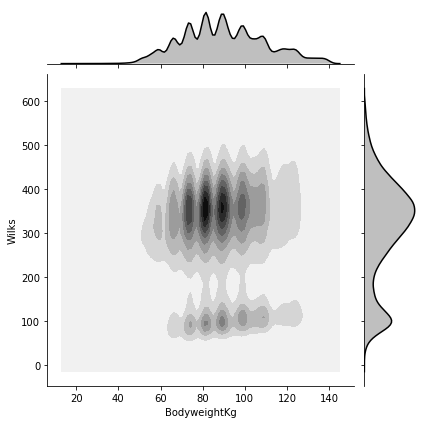

In [12]:
sns.jointplot(data_set_male[(data_set_male.BodyweightKg.isna() == False) & (data_set_male.BodyweightKg < 140) & (data_set_male.Wilks < 600)].BodyweightKg, 
              data_set_male[(data_set_male.BodyweightKg.isna() == False) & (data_set_male.BodyweightKg < 140) & (data_set_male.Wilks < 600)].Wilks,  
              kind="kde", 
              color="k" )

In [13]:
data_set_male.Equipment.value_counts()

Raw           128650
Single-ply    127099
Wraps          34847
Multi-ply       8442
Straps             7
Name: Equipment, dtype: int64

In [18]:
data_set.columns

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg',
       'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'MeetPath', 'Federation', 'Date', 'MeetCountry', 'MeetState',
       'MeetTown', 'MeetName'],
      dtype='object')

In [58]:
regression_data = data_set[['Age','Equipment','Sex','BodyweightKg','BestSquatKg','BestBenchKg','BestDeadliftKg']]

In [59]:
regression_data = regression_data.dropna()

In [60]:
regression_data.head()

,Age,Equipment,Sex,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg
0,47.0,Wraps,F,59.60,47.63,20.41,70.31
1,42.0,Single-ply,F,58.51,142.88,95.25,163.29
2,42.0,Single-ply,F,58.51,142.88,95.25,163.29
5,28.0,Wraps,F,62.41,170.10,77.11,145.15
6,60.0,Raw,F,67.31,124.74,95.25,163.29


In [61]:
enc = OneHotEncoder()
class_label = LabelEncoder()

In [62]:
gender_mapping = {'F':0,'M':1}

equipment_mapping = {'Raw':0 ,'Wraps': 1, 'Single-ply':2, 'Multi-ply':3}

In [63]:
regression_data.Equipment.value_counts()

Raw           70783
Wraps         22149
Single-ply    13152
Multi-ply      1873
Name: Equipment, dtype: int64

In [64]:
regression_data['Equipment Map'] = regression_data['Equipment'].map(equipment_mapping)

In [65]:
regression_data.head()

,Age,Equipment,Sex,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Equipment Map
0,47.0,Wraps,F,59.60,47.63,20.41,70.31,1
1,42.0,Single-ply,F,58.51,142.88,95.25,163.29,2
2,42.0,Single-ply,F,58.51,142.88,95.25,163.29,2
5,28.0,Wraps,F,62.41,170.10,77.11,145.15,1
6,60.0,Raw,F,67.31,124.74,95.25,163.29,0


In [66]:
labels = class_label.fit_transform(regression_data['Sex'].values)

In [67]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
class_label.inverse_transform(labels)

/Users/Lee/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['F', 'F', 'F', ..., 'M', 'M', 'M'], dtype=object)

In [69]:
regression_data['Gender Label'] = labels

In [120]:
transformed_data = pd.get_dummies(regression_data[['Equipment','Sex','Age','BodyweightKg','BestSquatKg','BestBenchKg','BestDeadliftKg']])

In [121]:
transformed_data.head()

,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Wraps,Sex_F,Sex_M
0,47.0,59.60,47.63,20.41,70.31,0,0,0,1,1,0
1,42.0,58.51,142.88,95.25,163.29,0,0,1,0,1,0
2,42.0,58.51,142.88,95.25,163.29,0,0,1,0,1,0
5,28.0,62.41,170.10,77.11,145.15,0,0,0,1,1,0
6,60.0,67.31,124.74,95.25,163.29,0,1,0,0,1,0


In [122]:
transformed_data = transformed_data[(transformed_data.BestSquatKg > 0) & (transformed_data.BestBenchKg > 0) & (transformed_data.BestDeadliftKg > 0)]

In [134]:
reg = linear_model.LinearRegression()
target = ['BestDeadliftKg']

cols = [c for c in transformed_data.columns if c not in target]
y = transformed_data[cols]
X = transformed_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

In [135]:
reg.fit(y_train, X_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
reg.score(y_test, X_test)

0.8754331807762752

In [139]:
reg.coef_, reg.intercept_

(array([[-1.43362202e-02,  2.11394841e-02,  5.99592481e-01,
          2.33849196e-01, -2.72146641e+01,  1.71841508e+01,
         -2.50048902e+00,  1.25310023e+01, -1.07500735e+01,
          1.07500735e+01]]), array([48.17516183]))